# ***Deep Dive into Rice Disease Classification 🌾🧪: Understanding Each Step***

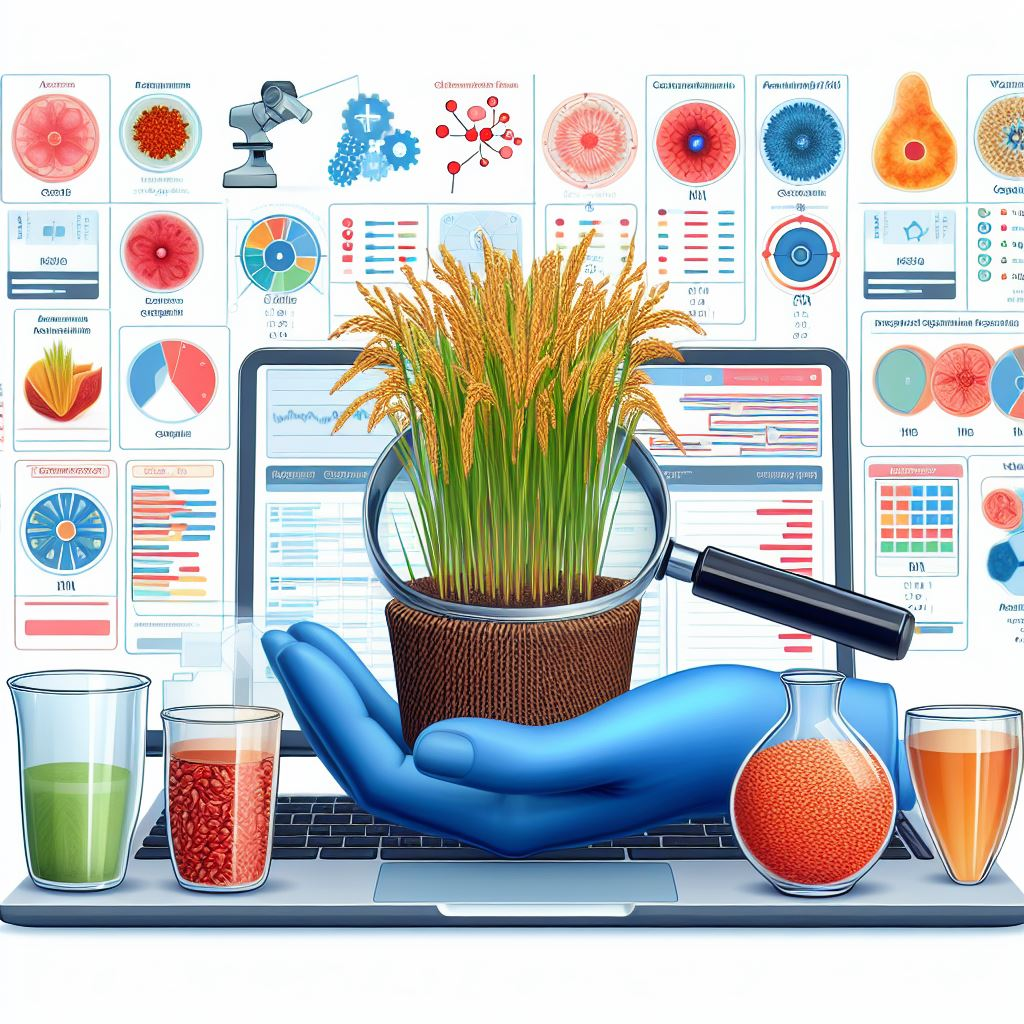

## **About The Author** 


**Author Name**:       Saman Fatima 

*Lets Connect to learn and bring a positive change in the industry* 

[`Facebook`](https://www.facebook.com/saman.fatima.50364592/)

[`Github`](https://github.com/SamanFatima7)

[`kaggle`](https://www.kaggle.com/samanfatima7)

[`Linkedin`](https://www.linkedin.com/in/saman-fatima-datascience/)

[`Twitter`](https://twitter.com/SamanFatima9106)

####  **Sequential**:

A Keras model type that allows you to create neural networks layer by layer, simplifying the process of building and understanding deep learning models.

*Example*: Imagine building a LEGO model step by step, adding one piece at a time. Sequential model in Keras lets you do the same with neural networks, adding layers one after another to create a complete network.


#### **Dense**: 

A fully connected layer in a neural network, where each neuron in the layer is connected to every neuron in the previous layer, used for learning non-linear relationships in data.

*Example*: Just like each person in a neighborhood knowing everyone else, a dense layer in a neural network connects every neuron from the previous layer to each neuron in the current layer, allowing for rich connections and learning complex patterns in data.


#### **Conv2D**:

A 2D convolutional layer in a neural network, used for detecting patterns in spatial data like images by sliding a convolutional kernel over the input data.

**Example**: Similar to how you scan a picture for details, a Conv2D layer slides a small window (filter) over an image to detect features like edges or shapes, helping the network understand the image content.


#### **MaxPooling2D**:

A layer that performs max pooling on 2D inputs, reducing the spatial dimensions of the input and helping the network focus on the most important features.

**Example**: If you had a grid of numbers representing a section of a drawing, MaxPooling2D would help you pick the highest number from each small grid, reducing the size but keeping the most important information.


#### **Flatten**:

A layer that converts the input into a 1D array, typically used to flatten the output of convolutional layers before passing it to a fully connected layer.

*Example*: Imagine you have a stack of papers with drawings on each page. Flattening them would mean stacking all the pages on top of each other to create a single long strip, which is easier to process further.


#### **BatchNormalization**:
A technique used to improve the training of deep neural networks by normalizing the inputs of each layer, reducing internal covariate shift and accelerating training.

**Example**: Think of BatchNormalization as adjusting the ingredients of a recipe to make it taste just right every time, helping the network learn more efficiently by keeping the data in a suitable range.


#### **Dropout**:

A regularization technique where a random fraction of the input units are set to zero during training, helping prevent overfitting by forcing the network to learn more robust features.

*Example*:

Picture studying for a test with a group of friends, but occasionally one of them is missing. Dropout works similarly, randomly "dropping out" some neurons during training, forcing the network to learn more robust features that don't rely on any single neuron.


#### **TensorFlow & Keras**: 

Unleashing the power of deep learning with ease, offering a seamless experience in building neural networks. TensorFlow empowers deep learning with its flexible and comprehensive framework, facilitating the creation of complex neural networks and enabling efficient computation on GPUs and TPUs. Keras, a high-level neural networks API, enables fast experimentation and prototyping of deep learning models with user-friendly syntax and seamless integration with TensorFlow.



# <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> 1 : IMPORTING LIBRARIES</p>

In [19]:
# importing the important libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> 2 : LOADING DATASET </p>

In [20]:
# Setting a seed value ensures that the random splitting of the dataset into 
# training and validation sets is reproducible, meaning the same split will be
# obtained each time the code is run.
seed = 123  

# The image_dataset_from_directory function is used to create training and
# validation datasets from image files, allowing for easy loading and preprocessing 
# of image data for our model.

train_ds = keras.utils.image_dataset_from_directory(
    directory='train_images',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=seed  # Add seed argument
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='train_images',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=seed  # Add seed argument
)

# Specifying labels="inferred" indicates that the class labels are inferred from the directory structure,
# where each subdirectory represents a different class.
# Using label_mode="int" specifies that the class labels are represented as integers,
# which is suitable for classification tasks.
# The datasets are split into training and validation subsets using validation_split=0.2,
# where 20% of the data is reserved for validation to evaluate the model's performance.


Found 10407 files belonging to 10 classes.
Using 8326 files for training.
Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


# <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> 3 : IMAGE NORMALIZATION </p>

- The `process` function is defined to normalize the image data by dividing the pixel values by 255 and converting them to `tf.float32` data type.
- The `map` method is used on the training dataset (`train_ds`) to apply the `process` function to each image-label pair in the dataset, effectively normalizing the image data in the dataset.
- Similarly, the `map` method is used on the validation dataset (`validation_ds`) to normalize the image data in the validation set as well.
- Normalizing the data helps in scaling the pixel values to a range between 0 and 1, which can improve the training of neural networks by making the optimization process more stable.
- Overall, this process ensures that both the training and validation datasets have normalized image data, which is important for training machine learning models effectively.


In [21]:
# Normalizing the data 
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

### <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> Classes</p>

- The `os` module is imported to access operating system functionalities.
- The directory path containing the dataset is stored in `dataset_path` variable.
- The `os.listdir(dataset_path)` function retrieves a list of all files and directories in the specified path (`dataset_path`).
- The list comprehension `[name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]` filters out only the directories from the list of files and directories.
- The `len()` function is used to count the number of directories, which corresponds to the number of classes in the dataset.
- Finally, the number of classes is printed to the console.


In [22]:
import os

# Get the directory path from the DirectoryIterator object
dataset_path = 'train_images'

# Count the number of subdirectories (classes)
num_classes = len([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])

print("Number of classes:", num_classes)



Number of classes: 10


# <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> 4 : DEFINING MODEL </p>

- `model = Sequential()` initializes a sequential model, allowing layers to be added in sequence.

- `Conv2D`, `MaxPooling2D`, `Flatten`, and `Dense` layers are added to the model to create a convolutional neural network (CNN).

- Each `Conv2D` layer applies convolutional filters to extract features from the input image, with varying numbers of filters and kernel sizes.

- Each `MaxPooling2D` layer reduces the spatial dimensions of the input, helping the network focus on the most important features.

- The `Flatten` layer reshapes the output of the convolutional layers into a 1D array, preparing it for input into the dense layers.

- `Dense` layers are fully connected layers that perform classification based on the extracted features.

- `Dropout` layers are added to prevent overfitting by randomly setting a fraction of input units to zero during training.

- The final `Dense` layer has `num_classes` units and uses the softmax activation function to output probabilities for each class.


In [23]:
# Create CNN model 
# create CNN model

model = Sequential()


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',strides = 1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(3,3),padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',strides = 1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides = 1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='valid'))

model.add(Conv2D(16,kernel_size=(3,3),padding='same',strides = 1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

### <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> Summary Of The Model </p>

- The `model.summary()` method generates a summary of the neural network model, displaying the architecture and parameters of each layer.

- For each layer, the summary includes the layer type, output shape, number of parameters (trainable and non-trainable), and the total number of parameters.

- The summary provides a concise overview of the model's structure, making it easier to understand and debug complex neural networks.


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 84, 84, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 82, 82, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 27, 27, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 9, 9, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,930 (499.73 KB)

 Trainable params: 127,930 (499.73 KB)

 Non-trainable params: 0 (0.00 B)

# <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> 5: COMPILING MODEL </p>

- `from tensorflow.keras.optimizers.legacy import Adam` imports the Adam optimizer from the TensorFlow module.

- `model.compile()` is used to configure the model for training.

- `optimizer='adam'` specifies that the Adam optimizer will be used to optimize the model's weights during training.

- `loss='sparse_categorical_crossentropy'` specifies the loss function to measure how well the model predicts the correct labels.

- `metrics=['accuracy']` specifies that the accuracy metric will be used to evaluate the performance of the model during training and testing.


In [25]:
from tensorflow.keras.optimizers.legacy import Adam

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> Callback  </p>

- `early_stopping = keras.callbacks.EarlyStopping()` creates an EarlyStopping callback object, which stops the training process if certain conditions are met.

- `monitor="val_loss"` specifies that the validation loss will be monitored to determine when to stop the training.

- `min_delta=0` specifies the minimum change in the monitored quantity to qualify as an improvement.

- `patience=5` specifies the number of epochs with no improvement after which training will be stopped.

- `verbose=0` controls the verbosity of the output during training.

- `mode="auto"` specifies the direction of improvement to be monitored (e.g., "min" for loss or "max" for accuracy).

- `baseline=None` can be set to the value of the monitored quantity at a certain epoch to define a baseline for early stopping.

- `restore_best_weights=False` specifies whether to restore the model weights from the epoch with the best value of the monitored quantity.


In [26]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,  # Set to the value of val_loss at the desired epoch
    restore_best_weights=False,
)



# <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> 6 : TRAINING THE MODEL </p>

- `model.fit()` trains the model on the training dataset (`train_ds`) and evaluates it on the validation dataset (`validation_ds`).

- `epochs=500` specifies the number of epochs (iterations over the entire dataset) for which to train the model.

- `callbacks=[early_stopping]` specifies a list of callbacks to be applied during training. In this case, the `early_stopping` callback will stop training if the validation loss does not improve for a specified number of epochs.

- The `history` variable stores the training history, including the loss and accuracy metrics for each epoch, which can be used for visualization and evaluation.


In [27]:
# real waly images use ni hongy jo images transform han wo use hongy
history = model.fit(train_ds, validation_data=validation_ds, epochs=20,callbacks=[early_stopping] )



Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 861ms/step - accuracy: 0.2052 - loss: 2.1438

KeyboardInterrupt: 

# <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> 7 : VISUALIZING THE MODEL PERFORMANCE </p>

- `plt.plot(history.history['accuracy'], label='Training Accuracy')` plots the training accuracy values stored in `history.history['accuracy']`.

- `plt.plot(history.history['val_accuracy'], label='Validation Accuracy')` plots the validation accuracy values stored in `history.history['val_accuracy']`.

- `plt.xlabel('Epoch')` sets the label for the x-axis to 'Epoch'.

- `plt.ylabel('Accuracy')` sets the label for the y-axis to 'Accuracy'.

- `plt.title('Training and Validation Accuracy')` sets the title of the plot to 'Training and Validation Accuracy'.

- `plt.legend()` adds a legend to the plot to differentiate between training and validation accuracy.

- `plt.show()` displays the plot.


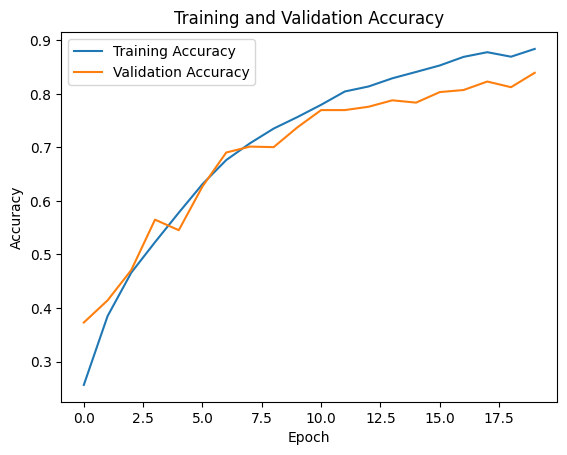

In [ ]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> Loading the test data </p>

- `from tensorflow.keras.preprocessing import image_dataset_from_directory` imports a function to create a dataset from images in a directory.

- `test_dir` specifies the directory containing the test images.

- `test_ds = image_dataset_from_directory(...)` creates a dataset from the test images directory with specific configurations.

- `label_mode=None` indicates that the dataset will not have labels.

- `shuffle=False` specifies that the dataset will not be shuffled.

- `image_size=(256, 256)` sets the size of the images in the dataset to 256x256 pixels.

- `batch_size=32` sets the batch size for the dataset.

- `def process(image): ...` defines a function to preprocess the images in the dataset.

- `test_ds = test_ds.map(process)` applies the preprocessing function to each image in the dataset.


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

test_dir = 'test_images'
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode=None,
    shuffle=False,
    image_size=(256, 256),
    batch_size=32,
)

# batch_size=32,
#     image_size=(256, 256),

def process(image):
    image = tf.cast(image / 255, tf.float32)
    return image

test_ds = test_ds.map(process)


Found 3469 files.


# <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> 8 : GETTING PREDICTIONS </p>

- `label_names` is a list containing the names of the classes for which predictions will be made.

- A loop iterates over the `test_ds` dataset to predict labels for each batch of images.

- `model.predict(images)` predicts the labels for the images in the batch using the trained model.

- `np.argmax(predictions, axis=1)` finds the index of the class with the highest probability for each image.

- `predicted_labels_all.extend(predicted_classes)` adds the predicted class indices to a list.

- `predicted_labels_names_all` maps the predicted class indices to their corresponding class names using `label_names`.

- The loop then prints the predicted labels for the first few images, showing the image number and its predicted label name.


In [ ]:
# Assuming label_names contains the class names in the correct order
label_names = ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast',
               'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']

# Predict labels for test images
predicted_labels_all = []
for images in test_ds:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    predicted_labels_all.extend(predicted_classes)

# Map predicted class indices to class names
predicted_labels_names_all = [label_names[prediction] for prediction in predicted_labels_all]

# Print predicted labels for the first few images
num_predictions = 5  # Number of predictions to print
for idx, label in enumerate(predicted_labels_names_all[:num_predictions]):
    print(f"Image {idx + 1}: Predicted Label: {label}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

# <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> 9 : STORING THE PREDICTIONS </p>

- `predicted_labels_df` is a DataFrame created from `predicted_labels_names_all` containing the predicted labels.

- `submission_df` is a DataFrame loaded from the 'sample_submission.csv' file.

- The predicted labels are added to the 'label' column of `submission_df` from `predicted_labels_df`.

- The updated `submission_df` is saved back to the 'sample_submission.csv' file without including the index.


In [ ]:


# Assuming predicted_labels_names_all contains all predicted labels
predicted_labels_df = pd.DataFrame({'label': predicted_labels_names_all})

# Load the sample_submission.csv file
submission_df = pd.read_csv('sample_submission.csv')

# Add the predicted labels to the submission dataframe
submission_df['label'] = predicted_labels_df['label']

# Save the updated dataframe back to the sample_submission.csv file
submission_df.to_csv('sample_submission.csv', index=False)


In [ ]:
submission_df.head()

,image_id,label
0,200001.jpg,hispa
1,200002.jpg,normal
2,200003.jpg,blast
3,200004.jpg,blast
4,200005.jpg,blast


Thank you for exploring this notebook! 🚀 If you found it helpful or have any feedback, please feel free to leave a comment or upvote. Your engagement and feedback are highly appreciated! 🙌

# <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:#023020;"> 10 : THE END :) </p>

In [ ]:
model.save('rice_disease_classifier.h5')